利用TF-IDF来计算文本间的相似度， 其计算原理是根据各文本对应word的TF-IDF值进行内积计算来表示近似度。具体计算流程为：<br>
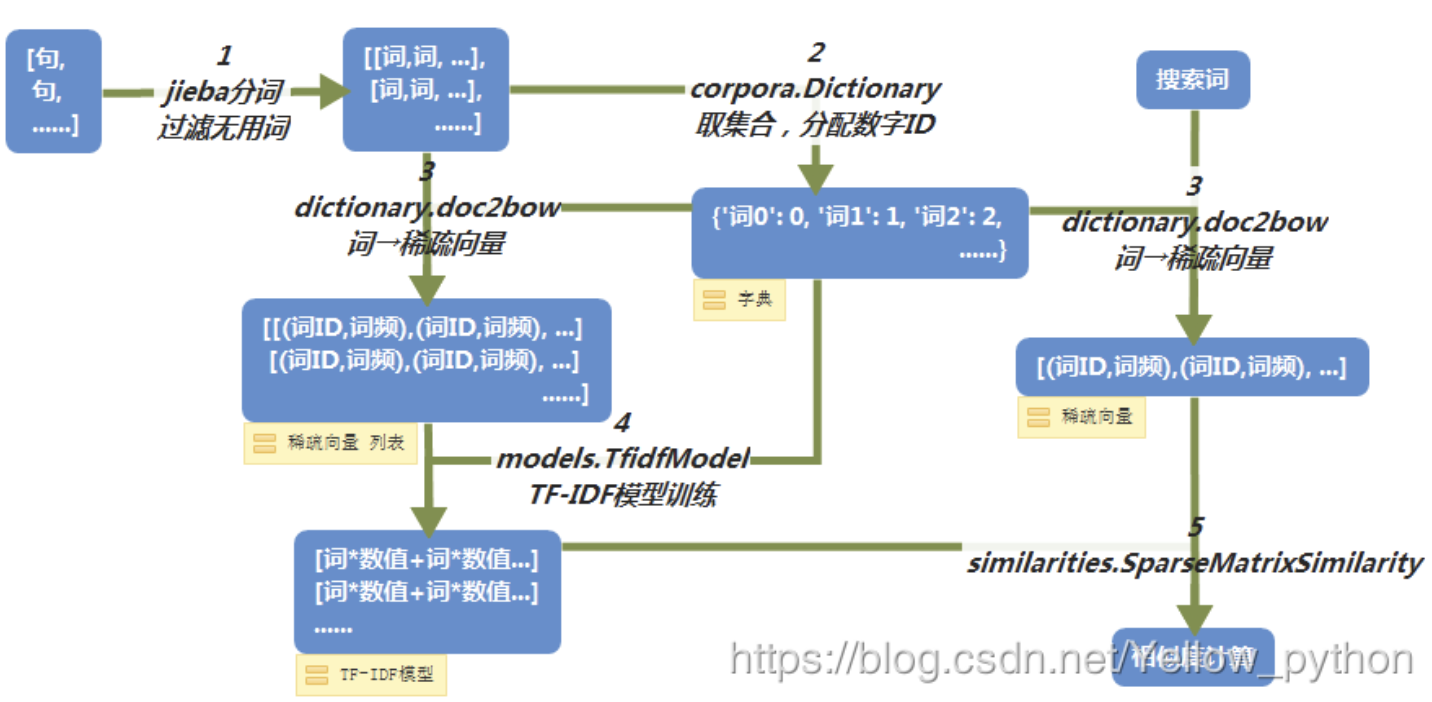

In [1]:
import jieba
from gensim import corpora, models, similarities

In [2]:
# 文本及搜索词
raw_documents = ['今天是星期天，天气不错',
                '今天身体有点疲惫，准备去健身房',
                '我是个健身菜鸟，但是希望拥有强健的身体']

keyword = '今天适合健身'

In [3]:
# 1.将【原始文本】进行分词处理，生成【分词列表】
texts = [jieba.lcut(document) for document in raw_documents]

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/rk/nnl9yhm55kb6325ckffkn6hw0000gn/T/jieba.cache
Loading model cost 0.690 seconds.
Prefix dict has been built succesfully.


In [4]:
# 2.基于【分词列表】，建立【词典】，并获取【特征数】
dictionary = corpora.Dictionary(texts)
num_features = len(dictionary.token2id)

In [6]:
# 3. 基于【词典】生成各文本对应的【稀疏向量】
corpus = [dictionary.doc2bow(text) for text in texts]

kw_vector = dictionary.doc2bow(jieba.lcut(keyword))

In [8]:
# 4. 创建【TF-IDF模型】，并将各文本转化为【TF-IDF向量】
tfidf = models.TfidfModel(corpus)

tf_texts = tfidf[corpus]
tf_kw = tfidf[kw_vector]

In [9]:
# 5. 根据【TF-IDF向量】计算文本相似度
sparse_matrix = similarities.SparseMatrixSimilarity(tf_texts, num_features=num_features)

sim = sparse_matrix.get_similarities(tf_kw)
for t, s in enumerate(sim):
    print('kw和text{}的相似度为：{}'.format(t, s))

kw和text0的相似度为：0.070640429854393
kw和text1的相似度为：0.05565228685736656
kw和text2的相似度为：0.3080870807170868
